In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from itertools import combinations
from collections import Counter

In [2]:
path = os.path.abspath('D:\DKTA\Tai lieu\github\project\Sales-Reporting\Sales-Reporting-main\data') 

In [3]:
files = os.listdir(path) 
files

['sales2019_1.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_12.csv',
 'sales2019_2.csv',
 'sales2019_3.csv',
 'sales2019_4.csv',
 'sales2019_5.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_8.csv',
 'sales2019_9.csv']

In [4]:
df = pd.DataFrame()
for file in files:
    if file.endswith('.csv'):
        filepath = path + '\\' + file
        df = df.append(pd.read_csv(filepath), ignore_index=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
df.columns = ['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date', 'Purchase_Address']
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
df.shape

(186850, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186305 non-null  object
 3   Price_Each        186305 non-null  object
 4   Order_Date        186305 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
# Have rows include header so we should del them
df['Quantity_Ordered'].value_counts()


1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity_Ordered, dtype: int64

In [9]:
# Check missing value
df.isna().sum()

Order_ID            545
Product             545
Quantity_Ordered    545
Price_Each          545
Order_Date          545
Purchase_Address    545
dtype: int64

In [10]:
# Drop #Na, remove header
df.dropna(inplace = True, how='all')
df=df[df['Quantity_Ordered']!='Quantity Ordered']
df.shape

(185950, 6)

In [11]:
# Cast a pandas object to a specified dtype
df = df.astype({'Product':'category',
                'Quantity_Ordered':'int',
                'Price_Each':'float',
                'Quantity_Ordered':'int'})

df['Order_Date'] = pd.to_datetime(df['Order_Date'])

df['day'] = pd.DatetimeIndex(df['Order_Date']).day
df['month'] = pd.DatetimeIndex(df['Order_Date']).month


In [12]:
# Add new column: calculate total, city
df['Sales'] = df['Quantity_Ordered'] * df['Price_Each']
df['City'] = df['Purchase_Address'].apply(lambda x: x.split(',')[1])
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,day,month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",22,1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",28,1,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",17,1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",5,1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",25,1,11.99,Austin


In [13]:
# Create dataframe 
all_products = df.groupby('Product').sum()['Quantity_Ordered']
prices = df.groupby('Product').mean()['Price_Each']
total = df.groupby('Product').sum()['Sales']

df_quantity_price = pd.concat([all_products, prices, total], axis=1)
df_quantity_price.sort_values(by='Quantity_Ordered', ascending=False, inplace=True)
df_quantity_price

,Quantity_Ordered,Price_Each,Sales
Product,,,
AAA Batteries (4-pack),31017,2.99,92740.83
AA Batteries (4-pack),27635,3.84,106118.40
USB-C Charging Cable,23975,11.95,286501.25
Lightning Charging Cable,23217,14.95,347094.15
Wired Headphones,20557,11.99,246478.43
Apple Airpods Headphones,15661,150.00,2349150.00
Bose SoundSport Headphones,13457,99.99,1345565.43
27in FHD Monitor,7550,149.99,1132424.50
iPhone,6849,700.00,4794300.00


<ipython-input-14-0b80a2d6fed0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[0].set_xticklabels(x, rotation=45, size=12, ha='right')
<ipython-input-14-0b80a2d6fed0>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[1].set_xticklabels(x, rotation=45, size=12, ha='right')


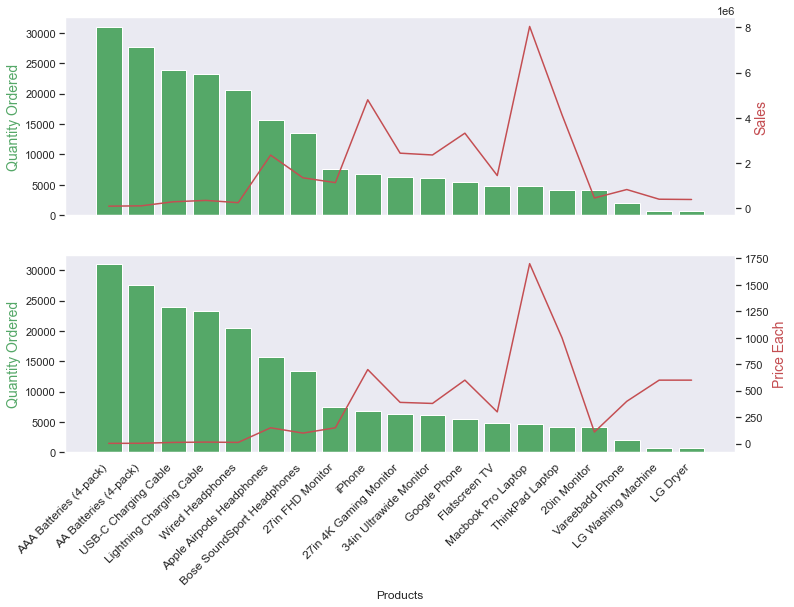

In [14]:
# What product sold the most? price of product and revenue of each product

fig, ax1 = plt.subplots(2, figsize=(12, 8))

x = df_quantity_price.index
y1 = df_quantity_price['Quantity_Ordered']
y2 = df_quantity_price['Sales']
y3 = df_quantity_price['Price_Each']

ax1[0].bar(x, y1, color='g')
ax1[0].set_ylabel('Quantity Ordered', color='g', size=14)
ax1[0].set_xticklabels(x, rotation=45, size=12, ha='right')
ax1[0].set(xticklabels=[])
ax1[0].grid(False)

ax2 = ax1[0].twinx()
ax2.plot(x, y2, 'r')
ax2.set_ylabel('Sales', color='r', size=14)
ax2.set(xticklabels=[])
ax2.grid(False)

ax1[1].bar(x, y1, color='g')
ax1[1].set_xlabel('Products')
ax1[1].set_ylabel('Quantity Ordered', color='g', size=14)
ax1[1].set_xticklabels(x, rotation=45, size=12, ha='right')
ax1[1].grid(False)

ax3 = ax1[1].twinx()
ax3.plot(x, y3, 'r')
ax3.set_ylabel('Price Each', color='r', size=14)
ax3.grid(False)

plt.show()

In [15]:
# Plot sum of products and total revenue by time
quantity_by_month = df.groupby('month').sum()['Quantity_Ordered']
total_by_month = df.groupby('month').sum()['Sales']

df_month = pd.concat([quantity_by_month, total_by_month], axis=1)

df_month


,Quantity_Ordered,Sales
month,,
1,10903,1.822257e+06
2,13449,2.202022e+06
3,17005,2.807100e+06
4,20558,3.390670e+06
5,18667,3.152607e+06
6,15253,2.577802e+06
7,16072,2.647776e+06
8,13448,2.244468e+06
9,13109,2.097560e+06


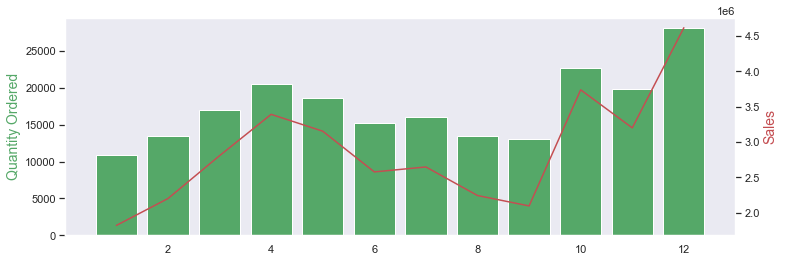

In [16]:
# What was the best month for sales? How much was earned that month?
fig, ax1 = plt.subplots( figsize=(12, 4))

x = df_month.index
y1 = df_month['Quantity_Ordered']
y2 = df_month['Sales']

ax1.bar(x, y1, color='g')
ax1.set_ylabel('Quantity Ordered', color='g', size=14)
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r')
ax2.set_ylabel('Sales', color='r', size=14)
ax2.grid(False)

In [17]:
# Plot sum of products and total revenue by city
quantity_by_city = df.groupby('City').sum()['Quantity_Ordered']
total_by_city = df.groupby('City').sum()['Sales']

df_city = pd.concat([quantity_by_city, total_by_city], axis=1)
df_city

,Quantity_Ordered,Sales
City,,
Atlanta,16602,2.795499e+06
Austin,11153,1.819582e+06
Boston,22528,3.661642e+06
Dallas,16730,2.767975e+06
Los Angeles,33289,5.452571e+06
New York City,27932,4.664317e+06
Portland,14053,2.320491e+06
San Francisco,50239,8.262204e+06
Seattle,16553,2.747755e+06


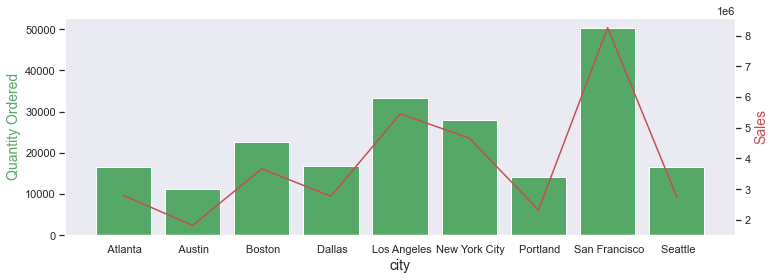

In [18]:
# What city has the best sales?
fig, ax1 = plt.subplots( figsize=(12, 4))

x = df_city.index
y1 = df_city['Quantity_Ordered']
y2 = df_city['Sales']

ax1.bar(x, y1, color='g')
ax1.set_ylabel('Quantity Ordered', color='g', size=14)
ax1.set_xlabel('city', size=14)
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r')
ax2.set_ylabel('Sales', color='r', size=14)
ax2.grid(False)

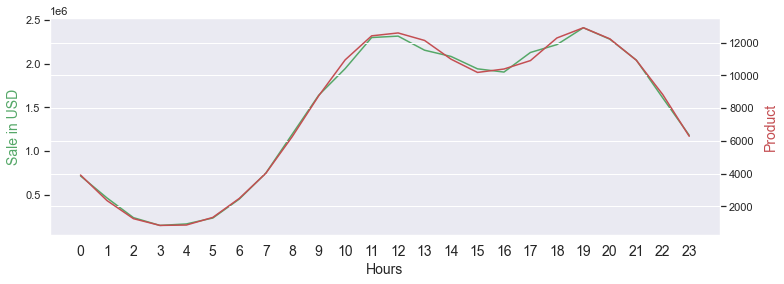

In [19]:
# What time should we display ads to maximize the likelihood of customer’s buying product?

fig, ax1 = plt.subplots( figsize=(12, 4))
df['Hours'] = df['Order_Date'].dt.hour
sales_value_hours = df.groupby('Hours').sum()['Sales']
product_value_hours = df.groupby('Hours').count()['Product']
hours = [hour for hour, sales in sales_value_hours.items()]

ax1.plot(hours, sales_value_hours, color='g')
ax1.grid()
plt.xticks(hours, size=14)
ax1.set_ylabel('Sale in USD', color='g', size=14)
ax1.set_xlabel('Hours', size=14)

ax2 = ax1.twinx()
ax2.plot(hours, product_value_hours, color='r')
ax2.set_ylabel('Product', color='r', size=14)

plt.show()

In [20]:
# What products are most often sold together?
# Find Order_ID duplicated
df_dup = df[df['Order_ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All_Products'] = df_dup.groupby('Order_ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order_ID', 'All_Products']].drop_duplicates()


<ipython-input-20-6ecbcbb27a6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All_Products'] = df_dup.groupby('Order_ID')['Product'].transform(groupProduct)


In [21]:
count = Counter()

for products in df_dup['All_Products']:
    product_list = products.split(",")
    count.update(Counter(combinations(product_list, 2)))

print(count)

Counter({('iPhone', ' Lightning Charging Cable'): 1005, ('Google Phone', ' USB-C Charging Cable'): 987, ('iPhone', ' Wired Headphones'): 447, ('Google Phone', ' Wired Headphones'): 414, ('Vareebadd Phone', ' USB-C Charging Cable'): 361, ('iPhone', ' Apple Airpods Headphones'): 360, ('Google Phone', ' Bose SoundSport Headphones'): 220, ('Vareebadd Phone', ' Wired Headphones'): 143, (' USB-C Charging Cable', ' Wired Headphones'): 120, ('Vareebadd Phone', ' Bose SoundSport Headphones'): 80, (' Lightning Charging Cable', ' Wired Headphones'): 62, ('Lightning Charging Cable', ' USB-C Charging Cable'): 55, ('Lightning Charging Cable', ' AA Batteries (4-pack)'): 52, ('AA Batteries (4-pack)', ' Lightning Charging Cable'): 51, ('Lightning Charging Cable', ' Lightning Charging Cable'): 51, (' USB-C Charging Cable', ' Bose SoundSport Headphones'): 51, ('AAA Batteries (4-pack)', ' USB-C Charging Cable'): 50, ('AA Batteries (4-pack)', ' AAA Batteries (4-pack)'): 48, ('AAA Batteries (4-pack)', ' AAA